# In-Class Demo for SIR Model with Birth and Death & Euler

We're going to implement the following simple recursion:
$$ t_{n+1} = t_n + \Delta t$$
$$ y_{n+1} = y_n + f(y_n, t_n) \cdot \Delta t$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max+stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0

    for idx,t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

In [6]:
def SIR_birthdeath(S0,I0,R0, beta, gamma, mu, t_max, stepsize):
    T = np.arange(0, t_max+stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0

    for idx,t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N - mu*S[idx-1] + mu*N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1] - mu*I[idx-1]
            dR_dt = gamma * I[idx-1] - mu*R[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

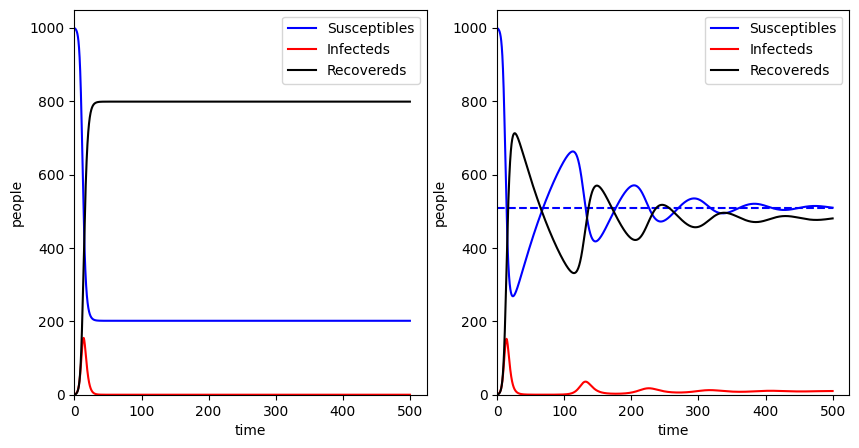

In [11]:
# SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
beta=1
gamma=0.5
mu = 0.01
t_max = 500 # 500

ax = axs[0]
S,I,R,T = SIR(999,1,0,
             beta,gamma,t_max,0.05)

ax.plot(T,S, color = 'b', label='Susceptibles')
ax.plot(T,I, color = 'r', label='Infecteds')
ax.plot(T,R, color = 'k', label='Recovereds')

ax = axs[1]
S,I,R,T = SIR_birthdeath(999,1,0,
             beta,gamma,mu,t_max,0.05)
R0 = beta/(gamma+mu)
Seq = 1/R0 * 1000
ax.plot([0,t_max], [Seq,Seq], "b--")

ax.plot(T,S, color = 'b', label='Susceptibles')
ax.plot(T,I, color = 'r', label='Infecteds')
ax.plot(T,R, color = 'k', label='Recovereds')

for ax in axs:
    ax.set_xlabel('time')
    ax.set_ylabel('people')
    ax.legend()
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)